In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns





In [3]:

data = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')

In [4]:

print(data.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

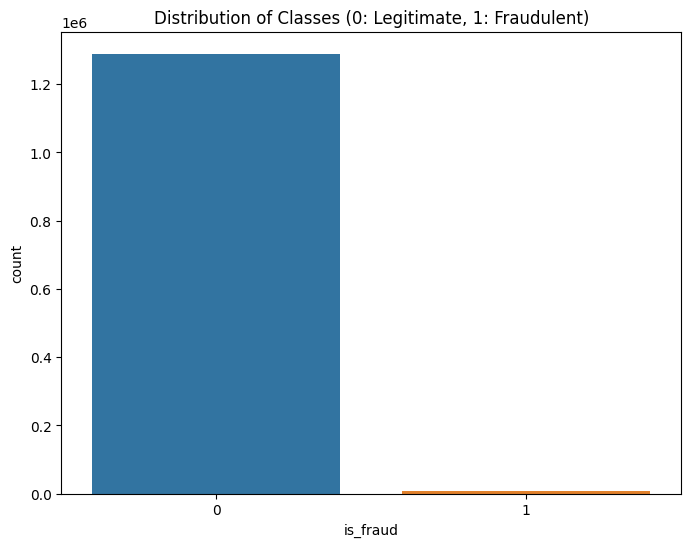

In [5]:
 # Visualize the distribution of the target variable (is_fraud)
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=data)
plt.title('Distribution of Classes (0: Legitimate, 1: Fraudulent)')
plt.show()

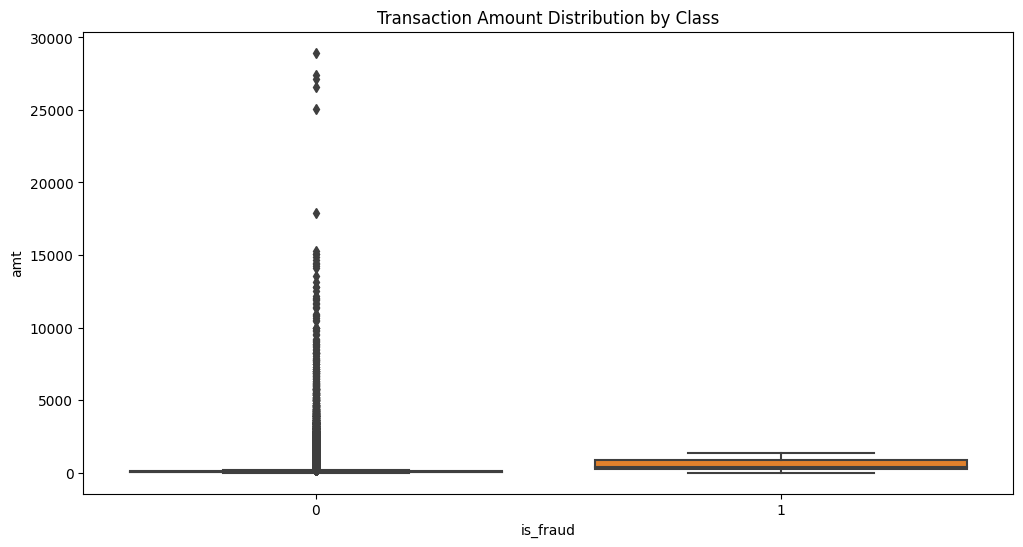

In [6]:
 # Visualize the distribution of transaction amount for each class
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_fraud', y='amt', data=data)
plt.title('Transaction Amount Distribution by Class')
plt.show()

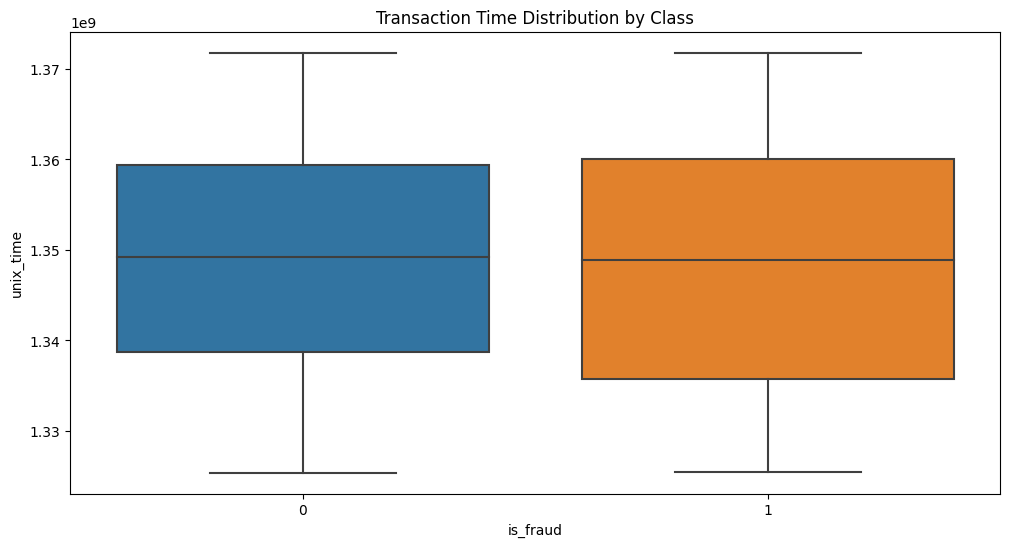

In [7]:
 
# Visualize the distribution of transaction time for each class
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_fraud', y='unix_time', data=data)
plt.title('Transaction Time Distribution by Class')
plt.show()

In [8]:
# One-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['category', 'gender', 'job'], drop_first=True)

# Drop unnecessary columns
data = data.drop(['trans_date_trans_time', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num', 'Unnamed: 0'], axis=1)

# Display the modified dataset
print(data.head())


             cc_num     amt      lat      long  city_pop   unix_time  \
0  2703186189652095    4.97  36.0788  -81.1781      3495  1325376018   
1      630423337322  107.23  48.8878 -118.2105       149  1325376044   
2    38859492057661  220.11  42.1808 -112.2620      4154  1325376051   
3  3534093764340240   45.00  46.2306 -112.1138      1939  1325376076   
4   375534208663984   41.96  38.4207  -79.4629        99  1325376186   

   merch_lat  merch_long  is_fraud  category_food_dining  ...  \
0  36.011293  -82.048315         0                 False  ...   
1  49.159047 -118.186462         0                 False  ...   
2  43.150704 -112.154481         0                 False  ...   
3  47.034331 -112.561071         0                 False  ...   
4  38.674999  -78.632459         0                 False  ...   

   job_Visual merchandiser  job_Volunteer coordinator  job_Warden/ranger  \
0                    False                      False              False   
1                    Fal

In [9]:

# Split the dataset into features (X) and target variable (y)
X = data.drop('is_fraud', axis=1)  
y = data['is_fraud']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
 # Logistic Regression with increased max_iter
log_reg_model = LogisticRegression(random_state=42,max_iter = 1000) 
log_reg_model.fit(X_train, y_train)
log_reg_predictions = log_reg_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [12]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{confusion_mat}")
    print(f"Classification Report:\n{classification_rep}")
    print("\n")

In [13]:
# Evaluate Logistic Regression model
evaluate_model(y_test, log_reg_predictions, "Logistic Regression")

# Evaluate Decision Tree model
evaluate_model(y_test, dt_predictions, "Decision Tree")

# Evaluate Random Forest model
evaluate_model(y_test, rf_predictions, "Random Forest")


Model: Logistic Regression
Accuracy: 0.9937
Confusion Matrix:
[[257676    139]
 [  1487     33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.19      0.02      0.04      1520

    accuracy                           0.99    259335
   macro avg       0.59      0.51      0.52    259335
weighted avg       0.99      0.99      0.99    259335



Model: Decision Tree
Accuracy: 0.9962
Confusion Matrix:
[[257321    494]
 [   481   1039]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.68      0.68      0.68      1520

    accuracy                           1.00    259335
   macro avg       0.84      0.84      0.84    259335
weighted avg       1.00      1.00      1.00    259335



Model: Random Forest
Accuracy: 0.9975
Confusion Matrix:
[[257691    124]
 [   525    995]]
Classification Re

In [14]:
# Save predictions to a DataFrame
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Logistic_Regression_Predictions': log_reg_predictions,
    'Decision_Tree_Predictions': dt_predictions,
    'Random_Forest_Predictions': rf_predictions
})

# Save the DataFrame to a CSV file
predictions_df.to_csv('/kaggle/working/predictions.csv', index=False)
